In [1]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import torchvision
#train test split
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

from torch.utils.data.sampler import SubsetRandomSampler

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [2]:

img_path = '/home/dk58319/private/workbench/results/pngfiles'
csv_path = '/home/dk58319/private/workbench/results/output_files/MI_annotation.csv'

In [3]:
df = pd.read_csv(csv_path)
#df['Unnamed: 0']
df.iloc[:, 1:12]

,ALMI,AMI,ASMI,ILMI,IMI,IPLMI,IPMI,LMI,PMI,non,ecg_id
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5
...,...,...,...,...,...,...,...,...,...,...,...
21794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21833
21795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21834
21796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21835
21797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,21836


In [4]:

class ECG_dataset(Dataset):
    def __init__(self, csv_path, path, transform=None):
        self.csv_path = csv_path
        self.path = path
        self.transform = transform
        self.df = pd.read_csv(csv_path)
        self.df.fillna(0)
        self.image_names = self.df['ecg_id']
        self.labels = self.df['non']

        # Stratified Shuffle Split 수행하여 train 및 test 인덱스 얻기
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
        train_idx, test_idx = next(sss.split(self.df, self.labels))

        # train 및 test 데이터셋 생성
        self.train_df = self.df.iloc[train_idx]
        self.test_df = self.df.iloc[test_idx]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        image = Image.open(os.path.join(self.path, str(self.image_names[index]).zfill(5)+'.png'))
        image = image.convert('RGB')
        image = image.resize((512, 512))
        if self.transform is not None:
            image = self.transform(image)
        
        label = self.df.iloc[index]['non']
        
        return image, label

In [9]:
transform = transforms.Compose(
    [
        transforms.RandomRotation(15),
        transforms.ToTensor(),
    ]
)
test_transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

transform_cnn = transforms.Compose(
    [
        transforms.RandomCrop(176),
        transforms.RandomHorizontalFlip(p = 0.3),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
    ]
)

dataset = ECG_dataset(csv_path, img_path, transform=transform)
dataset_len = len(dataset)
print(dataset_len)

train_dataset = ECG_dataset(csv_path, img_path, transform=transform_cnn)
test_dataset = ECG_dataset(csv_path, img_path, transform= test_transform)

train_indices = list(train_dataset.train_df.index)
test_indices = list(test_dataset.test_df.index)

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(train_dataset, batch_size=1, sampler=train_sampler, num_workers= 8)

test_sampler = SubsetRandomSampler(test_indices)
test_loader = DataLoader(test_dataset, batch_size=1, sampler=test_sampler, num_workers= 8)

21799


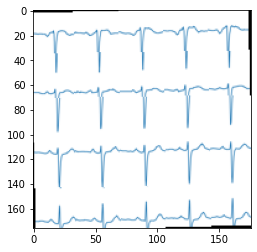

tensor([1.], dtype=torch.float64)


In [10]:
#visualize train test set
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()  
    
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(labels)

In [7]:
print(len(test_loader.dataset))

21799


In [8]:
print(test_indices)

[10306, 2031, 10286, 7810, 12833, 9804, 1389, 7143, 2891, 4803, 14833, 6051, 10470, 14806, 5194, 12764, 17325, 2139, 1423, 5568, 12894, 9784, 8672, 9546, 10843, 14363, 19204, 13405, 12453, 16538, 17338, 15215, 20068, 7853, 18394, 7873, 18902, 5589, 17068, 21610, 3559, 3304, 1865, 4536, 15039, 14687, 7213, 14526, 21734, 2234, 8447, 10888, 4517, 14047, 18013, 20066, 5662, 3336, 16792, 14985, 6775, 14412, 8726, 8944, 3490, 11226, 2331, 15295, 12756, 17037, 1095, 15149, 40, 1630, 8909, 21293, 7161, 3854, 21371, 21481, 1040, 3031, 20551, 13767, 18505, 10012, 12248, 1385, 8891, 2140, 2184, 11114, 5089, 21657, 8527, 21515, 9750, 16382, 3298, 11872, 13112, 7025, 16897, 18416, 14642, 21529, 4373, 21540, 17822, 1639, 290, 12504, 18994, 21205, 7971, 4310, 7393, 15764, 7202, 3470, 14379, 14195, 17884, 11648, 5508, 9017, 6005, 5446, 14305, 6266, 19513, 18384, 5253, 17230, 270, 11037, 21327, 20195, 5307, 8854, 2273, 3116, 5663, 7542, 1088, 6004, 839, 15659, 8997, 5278, 11780, 2215, 17003, 8040, 7511

In [27]:
print(train_indices)

[11879, 4426, 7754, 12536, 3132, 16426, 8297, 21241, 20302, 8837, 10863, 17785, 13266, 19542, 2404, 13518, 18318, 16076, 17927, 9901, 6411, 17322, 7988, 19766, 14610, 7986, 18630, 18137, 12242, 11581, 15026, 4981, 8370, 2092, 13018, 16261, 15715, 1473, 14948, 14907, 16595, 10453, 19660, 3948, 8873, 8471, 7053, 2569, 328, 15131, 6347, 11766, 1968, 11599, 14102, 17857, 15441, 18139, 794, 8975, 20923, 9806, 5138, 14992, 1949, 15304, 2825, 8325, 20902, 10812, 8974, 9344, 3462, 11935, 17812, 19445, 6336, 4437, 18008, 2393, 3118, 14368, 7180, 8245, 70, 10045, 4239, 20173, 20322, 1804, 19807, 1717, 19997, 2593, 14056, 3270, 12640, 13148, 21259, 5645, 9884, 5403, 17019, 14342, 21119, 18708, 10875, 15826, 6982, 20060, 11909, 5748, 2956, 3075, 7423, 18375, 2166, 11278, 20585, 15594, 10924, 11008, 21396, 9334, 4205, 2100, 5540, 11797, 11350, 439, 14795, 19725, 19692, 11725, 5635, 14454, 21074, 4659, 11367, 1379, 2602, 20655, 6625, 12562, 10936, 7038, 13330, 7152, 3236, 21120, 6926, 5027, 1702, 33